# Week 11: Sentiment Analysis, Part 2: Plotting Curves with Rolling Averages

This week, our questions and concepts are robust, but the amount of new code to learn is modest :)

Our focus is on plotting "sentiment curves." We will:
* Plot the raw values for sentiment in *The Sign of the Four*
* Calculate rolling averages, plot them, and investigate the portions of the text at which the minimum and maximum points occur

# Getting started

First, let's import our libraries, set our Pandas display options, and reload the data produced during last week's lecture (handily stored in a CSV that lives in the same folder as this notebook).

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
pd.set_option('display.max_colwidth', 0)

In [ ]:
sot4_sentence_sentiment_df = pd.read_csv("sot4_sentence_sentiment.csv")
sot4_sentence_sentiment_df[:15]

Now let's run the command we ended last lecture with, plotting the "raw" sentiment polarity values for every sentence in *The Sign of the Four*. Can we learn much from this?

In [ ]:
sot4_sentence_sentiment_df[['polarity']].plot(figsize=(20,8))

# OK, so that's a first attempt at making the data into something. What if we consider the Kurt Vonnegut chart Karl showed us?

## Cinderella 
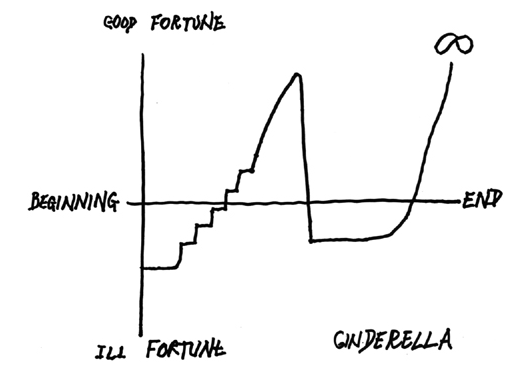

## Boy Meet Girl
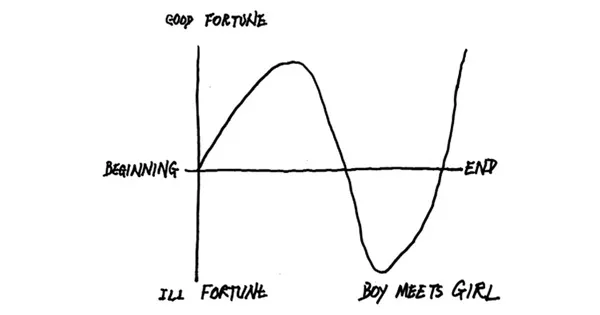







## Some questions for you and the person next to ya:

1. This chart uses the variable "fortune" in its y-axis. Is fortune the same as "sentiment"? What exactly do these things mean, and how do they differ? 
2. Vonnegut's charts seem easier to interpret than the chart that we just generated with Pandas. What would make this chart more intepretable? Can you imagine an ideal version of this chart for literary analysis? 

# Rolling Averages in Pandas

A **rolling average** will let us make the chart a little smoother and interpretable.

Pandas is basically built to do things like calculate rolling averages. It makes it really easy, which is awesome. All we need to do is specify:
- What part of the DataFrame we're interested in (here, the `polarity` column)
- That we want to do a rolling... something or other (the `.rolling()` method)... and that we want our rolling window size to be (here it's 10, indicated with the `window=10` agument) and that we want these rolling averages to be "centred" — which you'll understand if you were in lecture 😊 and which is explained in Mary's lecture (the `centered=True` argument)
- That the "something or other" we want are rolling **averages (or means)** (indicated with the `.mean()` method)

In [ ]:
sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

It would be a lot handier if that were a column in our DataFrame — so let's put that data there!

In [ ]:
sot4_sentence_sentiment_df['rolling_10_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

In [ ]:
sot4_sentence_sentiment_df[:15]

Now all we need to do is to plot our new column! 

Does that look any better?

In [ ]:
sot4_sentence_sentiment_df[['rolling_10_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity']].plot(figsize=(20,8))

Let's try some other window sizes: 25, 50, and 100. (You can try others, too!)

In [ ]:
sot4_sentence_sentiment_df['rolling_25_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=25, center=True).mean()

In [ ]:
sot4_sentence_sentiment_df[['rolling_25_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df[['rolling_10_polarity','rolling_25_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df['rolling_50_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=50, center=True).mean()

In [ ]:
sot4_sentence_sentiment_df[['rolling_50_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df[['rolling_25_polarity','rolling_50_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df['rolling_100_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=100, center=True).mean()

In [ ]:
sot4_sentence_sentiment_df[['rolling_100_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df[['rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity','rolling_25_polarity','rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

## Mary will now show us a deeper dive into just what a rolling average really is...

# Finding the Maximum and Minimum Points

Why might we want to look at the minimum and maximum points?

***Let's describe each of these to help us keep track***

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

In [ ]:
sot4_sentence_sentiment_df['rolling_50_polarity'].min()

In [ ]:
min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'].min()

In [ ]:
sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

In [ ]:
has_min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

In [ ]:
sot4_sentence_sentiment_df[has_min_polarity_50]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].min()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].min()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].min()]

Let's have a look now at the *maximum* points...

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].max()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].max()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].max()]

In [ ]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].max()]

# Investigating the Extremes 

Let's have a look at the 50-sentence window that the `rolling_50_polarity` score indicates are the most negative and most positive, and see if seems like it's on to something...

(Yeah, that's right, I'm just taking the min and max points, then manually adding and subtracting 25 to make a 50-sentence window! The minimum window is centred at 807 and the maximum at 1533.)

In [ ]:
sot4_sentence_sentiment_df[782:832]
#.sort_values(by='rolling_50_polarity', ascending=False)

In [ ]:
sot4_sentence_sentiment_df[1508:1558]